<a href="https://colab.research.google.com/github/RohitVarma951/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

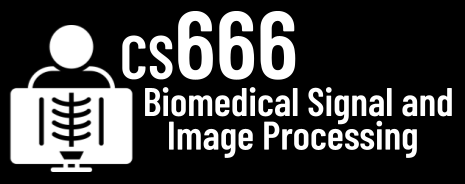
#Assignment 5

In [ ]:
# NAME: Rohit Varma Prudhvi Potturi

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: The Data Contains 220 slices. I saw this by observing the extracted ct.zip file. It contained 220 dicom
# files, where each dicom file represented each slice of the scan.

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

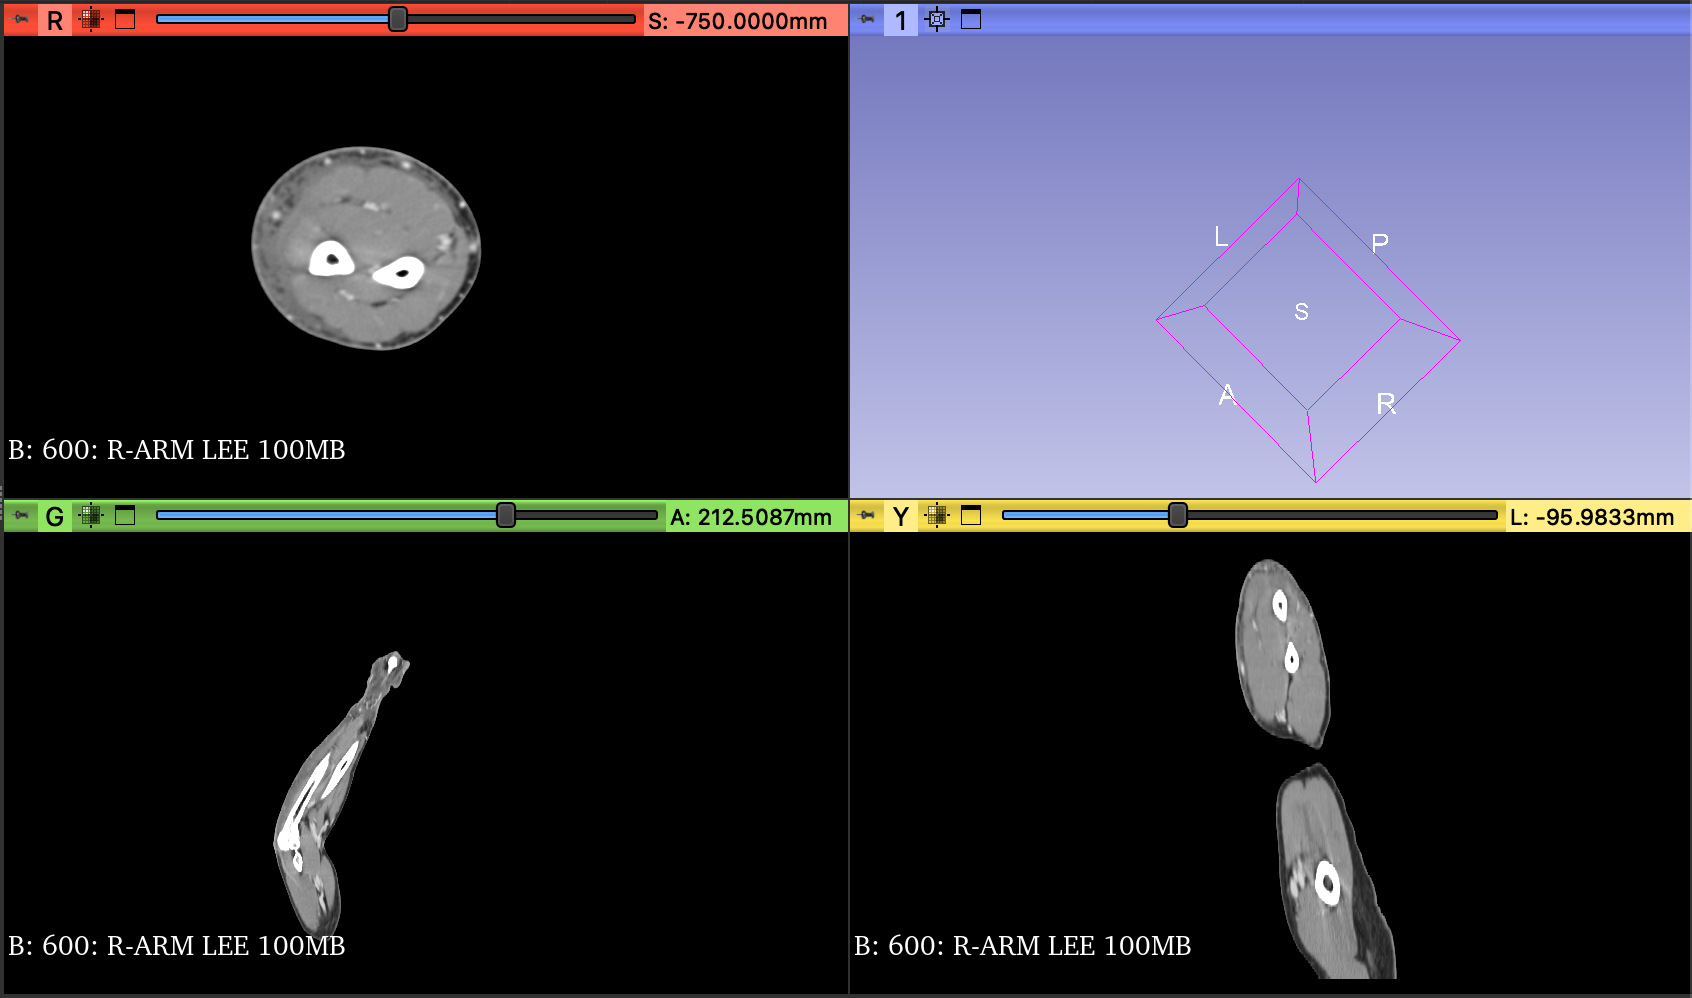

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

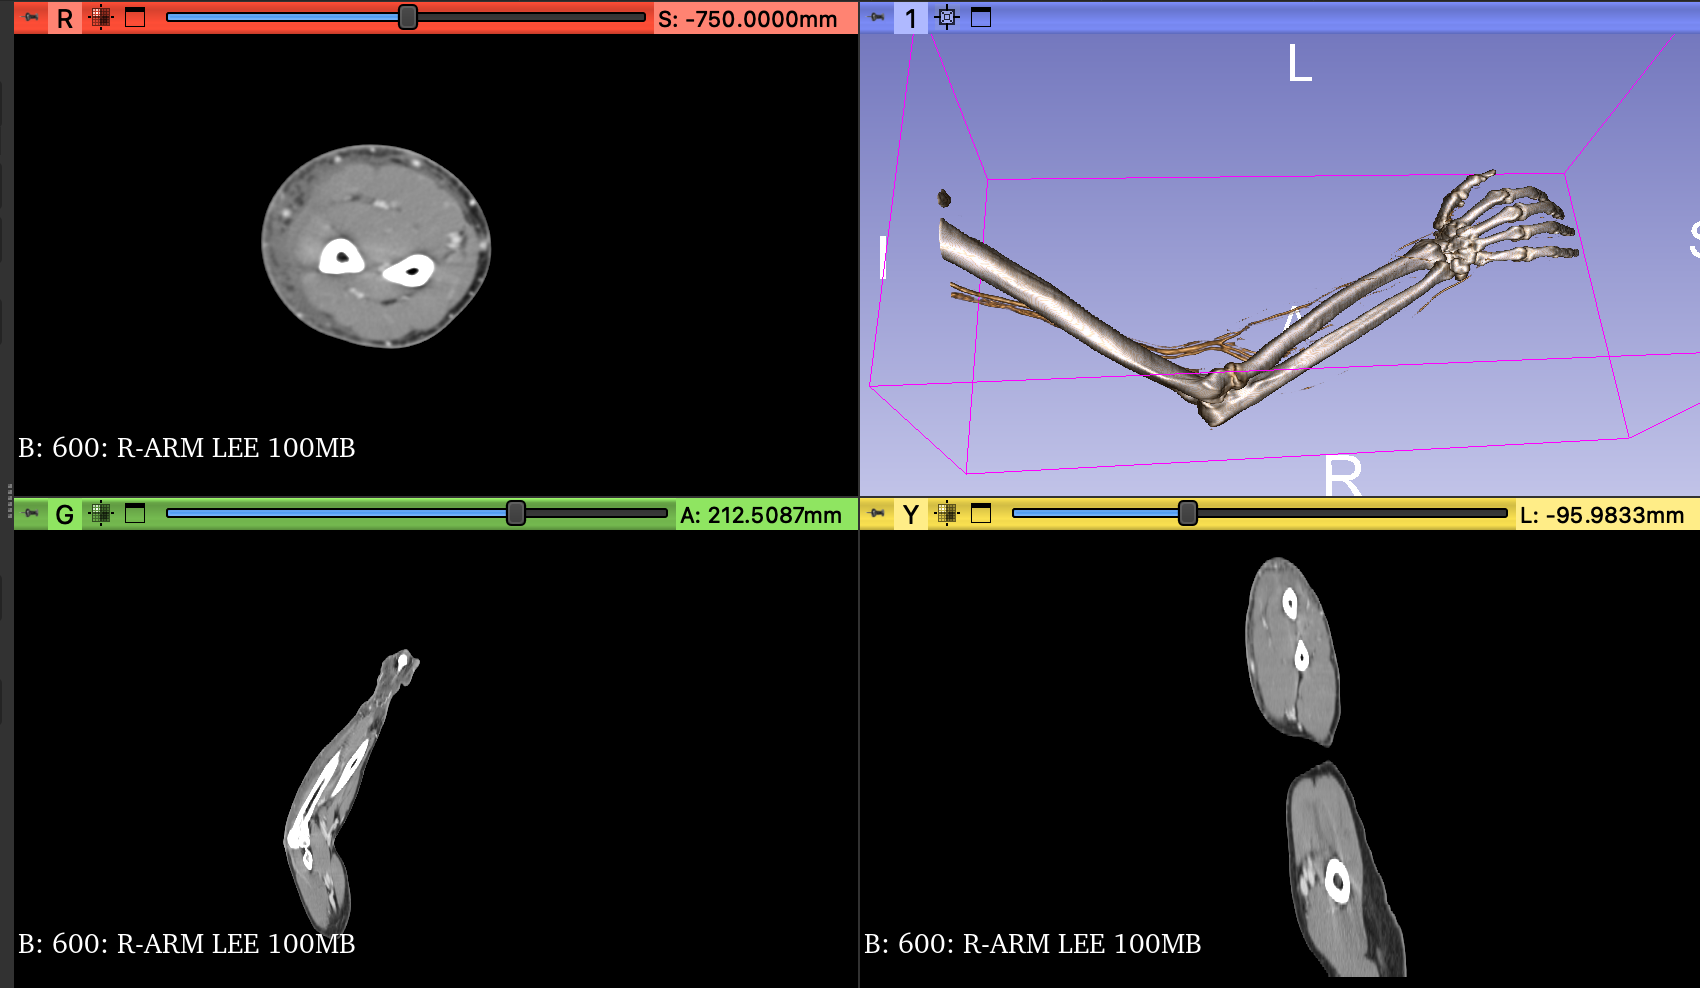

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [3]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [4]:
from pydicom import dcmread

In [5]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy

filesList = os.listdir("./ct/")
filesList.sort()

In [6]:
referenceSlice = dcmread("./ct/"+filesList[1])
dimensions = (int(referenceSlice.Rows), int(referenceSlice.Columns),len(filesList))

In [7]:
#new empty numpy array
a3DNumpyArray = numpy.zeros(dimensions, dtype = numpy.int16)

In [8]:
for i in range(0,len(filesList)):
  ds = dcmread("./ct/"+filesList[i])
  a3DNumpyArray[:,:,i] = ds.pixel_array

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [9]:
import matplotlib.pyplot as plt

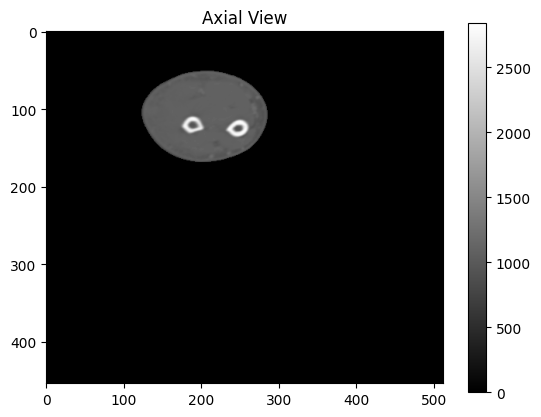

In [10]:
# TODO: YOUR CODE FOR AXIAL
axial_view = a3DNumpyArray[:,:,88]
plt.figure()
plt.imshow(axial_view, cmap='gray')
plt.title('Axial View')
plt.colorbar()

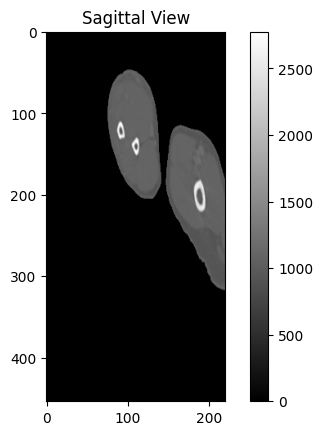

In [11]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_view = a3DNumpyArray[:,180,:]
plt.figure()
plt.imshow(sagittal_view, cmap='gray')
plt.title('Sagittal View')
plt.colorbar()

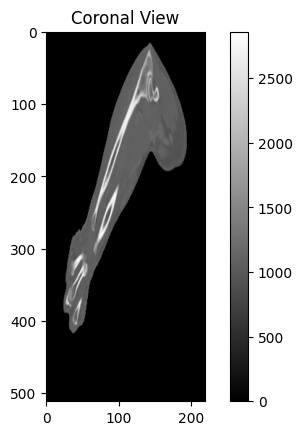

In [12]:
# TODO: YOUR CODE FOR CORONAL
coronal_view = a3DNumpyArray[123,:,:]
plt.figure()
plt.imshow(coronal_view, cmap='gray')
plt.title('Coronal View')
plt.colorbar()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [13]:
ds.WindowCenter

'30.0'

In [14]:
ds.WindowWidth

'410.0'

In [15]:
ds.RescaleIntercept

'-1024.0'

In [16]:
# TODO: YOUR CODE
window_Center = ds.WindowCenter
window_Width = ds.WindowWidth
rescale_intercept = ds.RescaleIntercept
vmin = window_Center - window_Width/2
vmax = window_Center + window_Width/2
print(window_Center,window_Width,rescale_intercept,vmin,vmax)

30 410 -1024 -175.0 235.0


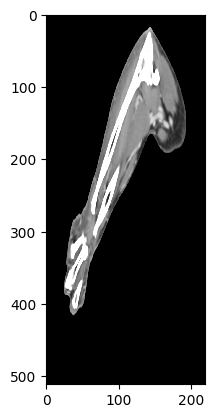

In [17]:
sample = a3DNumpyArray[123,:,:]
plt.imshow(sample + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

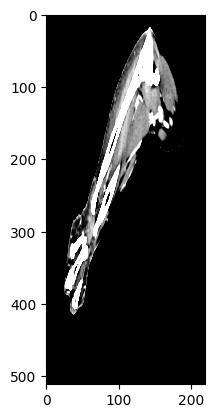

In [18]:
# TODO: YOUR CODE
window_Center = 50
window_Width = 120
vmin = window_Center - window_Width/2
vmax = window_Center + window_Width/2
plt.imshow(sample + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

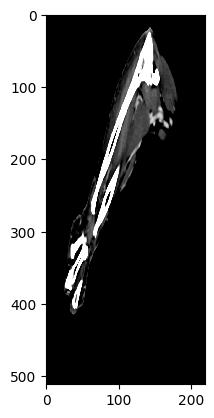

In [19]:
window_Center = 110
window_Width = 200
vmin = window_Center - window_Width/2
vmax = window_Center + window_Width/2
plt.imshow(sample + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

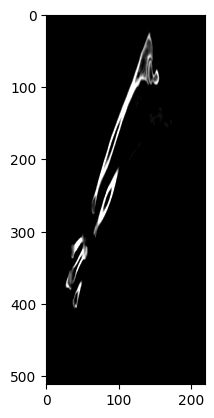

In [20]:
window_Center = 700
window_Width = 1200
vmin = window_Center - window_Width/2
vmax = window_Center + window_Width/2
plt.imshow(sample + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: The window/level values that are close to the default window/levels ( 30, 410, ranges -175 to 235) seem to be a better fit,
# as it is easier to observe different parts of body(muscle, bone, fat, etc....) easily.
# while differing largely from these values makes it hard to observe the parts clearly.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

HU Thresholdings

Fat -120 to -90

Soft Tissue 100 to 300

Bones 300 to 1900

(https://en.wikipedia.org/wiki/Hounsfield_scale)

In [139]:
# TODO: YOUR CODE TO SEGMENT FAT
fat = a3DNumpyArray.astype(np.int16).copy()
fat[fat< -120] = 0
fat[fat> -90] = 0

In [138]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft = a3DNumpyArray.astype(np.int16).copy()
soft[soft< 100] = 0
soft[soft> 300] = 0

In [140]:
# TODO: YOUR CODE TO SEGMENT BONES
bones = a3DNumpyArray.astype(np.int16).copy()
bones[bones< 300] = 0
bones[bones>= 1900] = 1

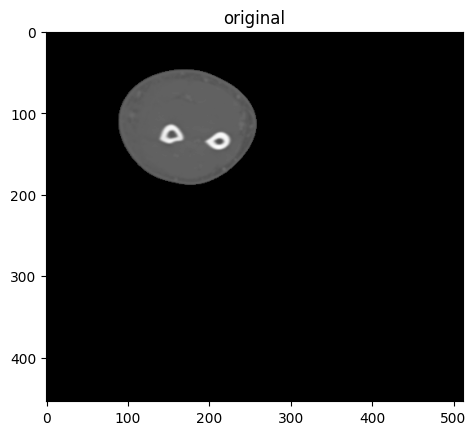

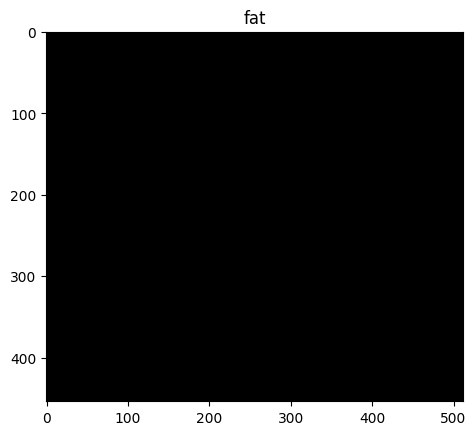

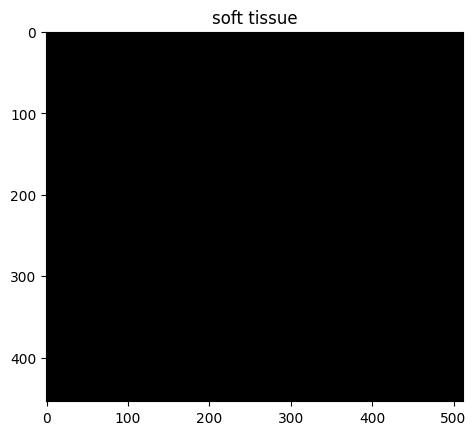

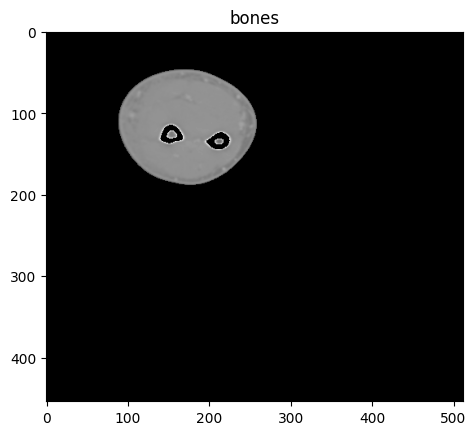

In [141]:
plt.imshow(a3DNumpyArray[:,:,100].astype(np.int16),cmap='gray')
plt.title('original')
plt.show()
sample = fat[:,:,100]
plt.imshow(sample,cmap='gray')
plt.title('fat')
plt.show()
sample = soft[:,:,100]
plt.imshow(sample,cmap='gray')
plt.title('soft tissue')
plt.show()
sample = bones[:,:,100]
plt.imshow(sample,cmap='gray')
plt.title('bones')
plt.show()

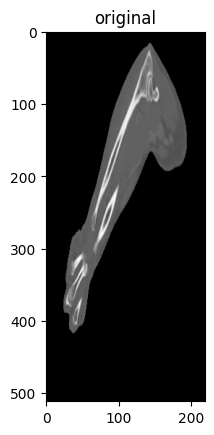

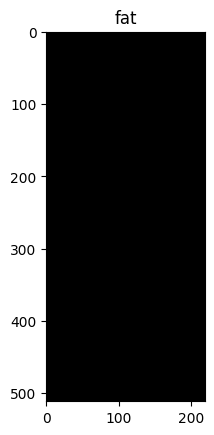

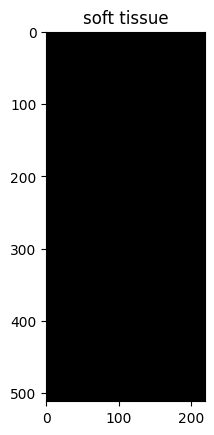

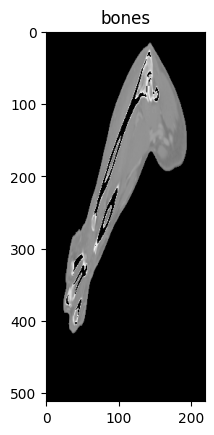

In [142]:
sample = a3DNumpyArray[123,:,:]
plt.imshow(sample,cmap='gray')
plt.title('original')
plt.show()
sample = fat[123,:,:]
plt.imshow(sample,cmap='gray')
plt.title('fat')
plt.show()
sample = soft[123,:,:]
plt.imshow(sample,cmap='gray')
plt.title('soft tissue')
plt.show()
sample = bones[123,:,:]
plt.imshow(sample,cmap='gray')
plt.title('bones')
plt.show()

In [143]:
# TODO: YOUR CODE TO SEGMENT FAT
fat = a3DNumpyArray.astype(np.int16).copy()

fat[fat< 1000] = 0
fat[fat> 1050] = 0

In [144]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft = a3DNumpyArray.astype(np.int16).copy()
soft[soft< 1050] = 0
soft[soft> 1200] = 0

In [145]:
# TODO: YOUR CODE TO SEGMENT BONES
bones = a3DNumpyArray.astype(np.int16).copy()
bones[bones< 1200] = 0
bones[bones>= 1200] = 1

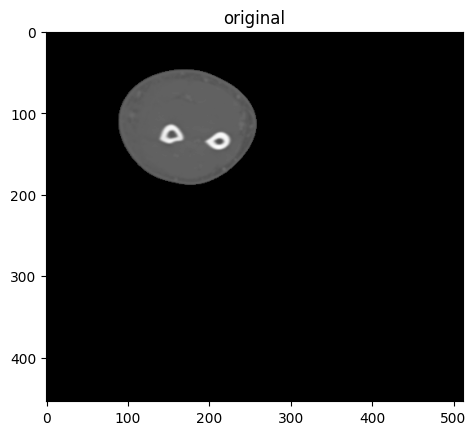

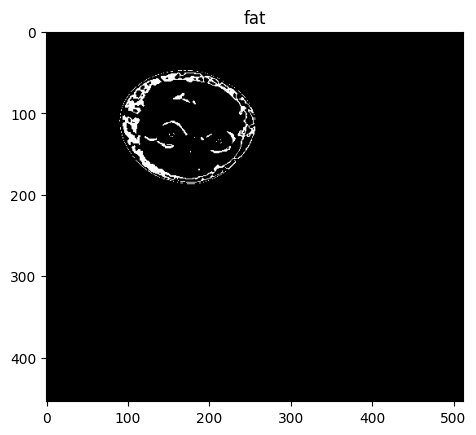

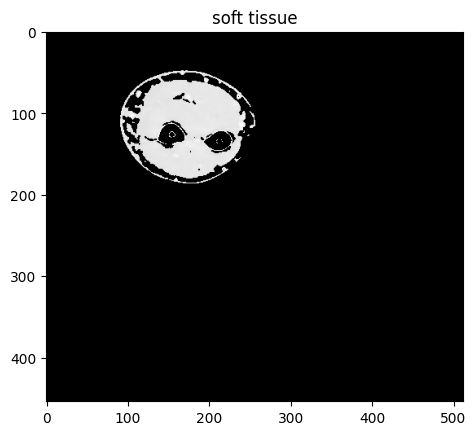

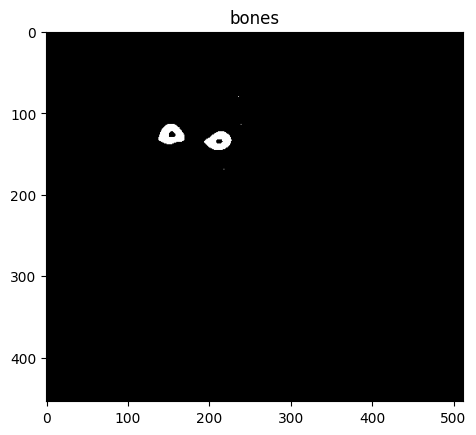

In [146]:
plt.imshow(a3DNumpyArray[:,:,100].astype(np.int16),cmap='gray')
plt.title('original')
plt.show()
sample = fat[:,:,100]
plt.imshow(sample,cmap='gray')
plt.title('fat')
plt.show()
sample = soft[:,:,100]
plt.imshow(sample,cmap='gray')
plt.title('soft tissue')
plt.show()
sample = bones[:,:,100]
plt.imshow(sample,cmap='gray')
plt.title('bones')
plt.show()

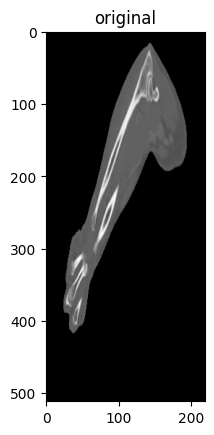

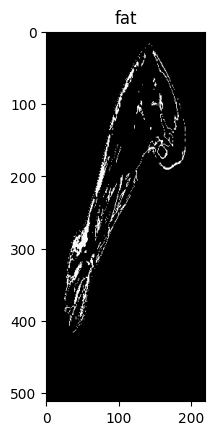

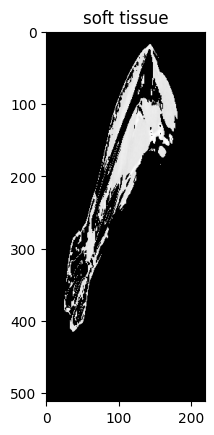

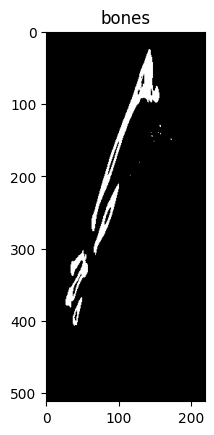

In [147]:
sample = a3DNumpyArray[123,:,:]
plt.imshow(sample,cmap='gray')
plt.title('original')
plt.show()
sample = fat[123,:,:]
plt.imshow(sample,cmap='gray')
plt.title('fat')
plt.show()
sample = soft[123,:,:]
plt.imshow(sample,cmap='gray')
plt.title('soft tissue')
plt.show()
sample = bones[123,:,:]
plt.imshow(sample,cmap='gray')
plt.title('bones')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: I found that the Hounsfield Units weren't good for segementation of the given image.
# however i found that using the following thresholding was a better fit compared to hounsfield units for the file.
# fat 1000 to 1050
# soft tissue 1050 to 1200
# bones above 1200

In [ ]:
# with some help from Madhusudhan Makireddy
# references : https://en.wikipedia.org/wiki/Hounsfield_scale

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""